In [1]:

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/University and vocational schools admission in Russia 2014-2023.csv",delimiter=';')
print(df.shape)
df.head()

(5568, 10)


,Index,Education level,Degree,Tuition fees,ID,Branches of Science,Group of Professions,Year,Number of Applications,Number of Students
0,1,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Mathematics and Mechanics,2014,47923.0,7144.0
1,2,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Computer Science,2014,28787.0,3238.0
2,3,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Physics and Astronomy,2014,23906.0,4391.0
3,4,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Chemistry,2014,25930.0,2367.0
4,5,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Earth Science,2014,43434.0,6745.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   5568 non-null   int64  
 1   Education level         5568 non-null   object 
 2   Degree                  5568 non-null   object 
 3   Tuition fees            5568 non-null   object 
 4   ID                      5568 non-null   int64  
 5   Branches of Science     5568 non-null   object 
 6   Group of Professions    5568 non-null   object 
 7   Year                    5568 non-null   int64  
 8   Number of Applications  5016 non-null   float64
 9   Number of Students      5472 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 435.1+ KB


In [12]:
df.isnull().sum()

,0
Index,0
Education level,0
Degree,0
Tuition fees,0
ID,0
Branches of Science,0
Group of Professions,0
Year,0
Number of Applications,552
Number of Students,96


In [13]:
df= df.dropna(axis=0)
print(df.isnull().sum())
print(df.shape)
df.head()

Index                     0
Education level           0
Degree                    0
Tuition fees              0
ID                        0
Branches of Science       0
Group of Professions      0
Year                      0
Number of Applications    0
Number of Students        0
dtype: int64
(5016, 10)


,Index,Education level,Degree,Tuition fees,ID,Branches of Science,Group of Professions,Year,Number of Applications,Number of Students
0,1,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Mathematics and Mechanics,2014,47923.0,7144.0
1,2,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Computer Science,2014,28787.0,3238.0
2,3,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Physics and Astronomy,2014,23906.0,4391.0
3,4,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Chemistry,2014,25930.0,2367.0
4,5,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Earth Science,2014,43434.0,6745.0


In [14]:
df.describe(include="all")

,Index,Education level,Degree,Tuition fees,ID,Branches of Science,Group of Professions,Year,Number of Applications,Number of Students
count,5016.000000,5016,5016,5016,5016.000000,5016,5016,5016.000000,5.016000e+03,5016.000000
unique,NaN,2,5,2,NaN,10,57,NaN,NaN,NaN
top,NaN,Higher Education,Bachelor's degree,Scholarship / tuition-free,NaN,Engineering and Technology,Mathematics and Mechanics,NaN,NaN,NaN
freq,NaN,3078,1026,2736,NaN,2024,88,NaN,NaN,NaN
mean,2882.881180,NaN,NaN,NaN,3.824561,NaN,NaN,2019.045455,1.619659e+04,3936.492424
std,1505.072296,NaN,NaN,NaN,2.521201,NaN,NaN,2.619721,4.730477e+04,10052.449928
min,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2014.000000,0.000000e+00,0.000000
25%,1624.750000,NaN,NaN,NaN,2.000000,NaN,NaN,2017.000000,0.000000e+00,0.000000
50%,2900.500000,NaN,NaN,NaN,2.000000,NaN,NaN,2019.000000,1.858500e+03,555.000000
75%,4176.250000,NaN,NaN,NaN,5.000000,NaN,NaN,2021.000000,1.195125e+04,2982.250000


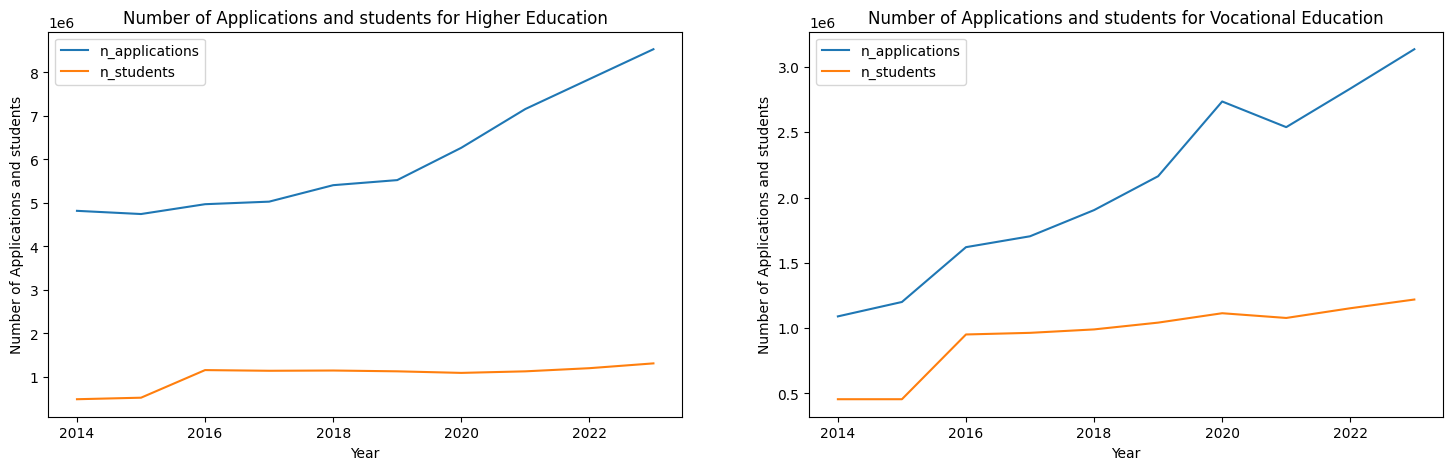

In [16]:
########Number of Applications and number of Students joined in Higher Education and Vocational Education

yr_ed=df[["Education level","Year","Number of Students","Number of Applications"]].groupby(["Education level","Year"]).agg(n_applications=("Number of Applications","sum"),
                                                                                                  n_students=("Number of Students","sum")).reset_index()

yr_ed1 =yr_ed[yr_ed["Education level"]=="Higher Education"]
yr_ed2 =yr_ed[yr_ed["Education level"]=="Vocational Education"]

fig,axes =plt.subplots(1,2,figsize=(18,5))
plt.subplot(1,2,1)
plt.plot("Year","n_applications",data=yr_ed1,label="Higher Education")
plt.plot("Year","n_students",data=yr_ed1,label="Higher Education")
plt.xlabel("Year")
plt.ylabel("Number of Applications and students")
plt.title("Number of Applications and students for Higher Education")
plt.legend(["n_applications","n_students"])
plt.subplot(1,2,2)
plt.plot("Year","n_applications",data=yr_ed2,label="Vocational Education")
plt.plot("Year","n_students",data=yr_ed2,label="Vocational Education")
plt.xlabel("Year")
plt.ylabel("Number of Applications and students")
plt.title("Number of Applications and students for Vocational Education")
plt.legend(["n_applications","n_students"])
plt.show()

In the above Graph,Number of Applications applied were significant increased from 2014 to 2023 and this shows that growing interest in both Education.There were steady increase in the Students who joined in the institutions and it shows that positive shift towards pursuing Education

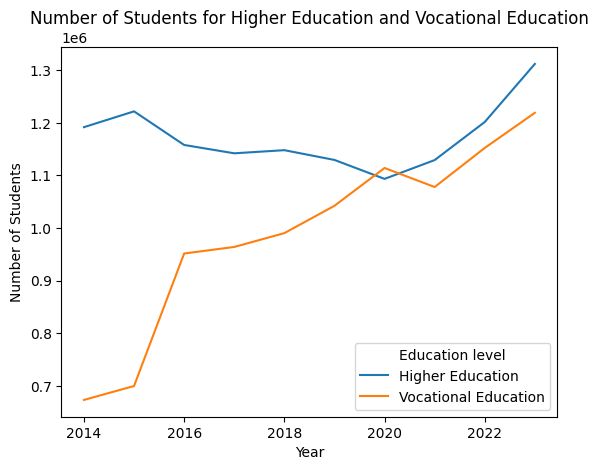

In [ ]:
####Number of Students in Higher Education Vs Vocational Education
sns.lineplot(data=yr_ed,x="Year",y="n_students",hue="Education level")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.title("Number of Students for Higher Education and Vocational Education")
plt.show()

The above graph illustrates that number of Students in Higher Education showed a  slightly decline between 2016 and 2020 and noticeable increase in student numbers after 2020.
In contrast, Vocational Education has experienced consistent growth over the same period. The number of students joining vocational programs has doubled, rising from 6 lakhs in 2014 to 12 lakhs in 2023, highlighting a significant shift toward skills-based, practical education.

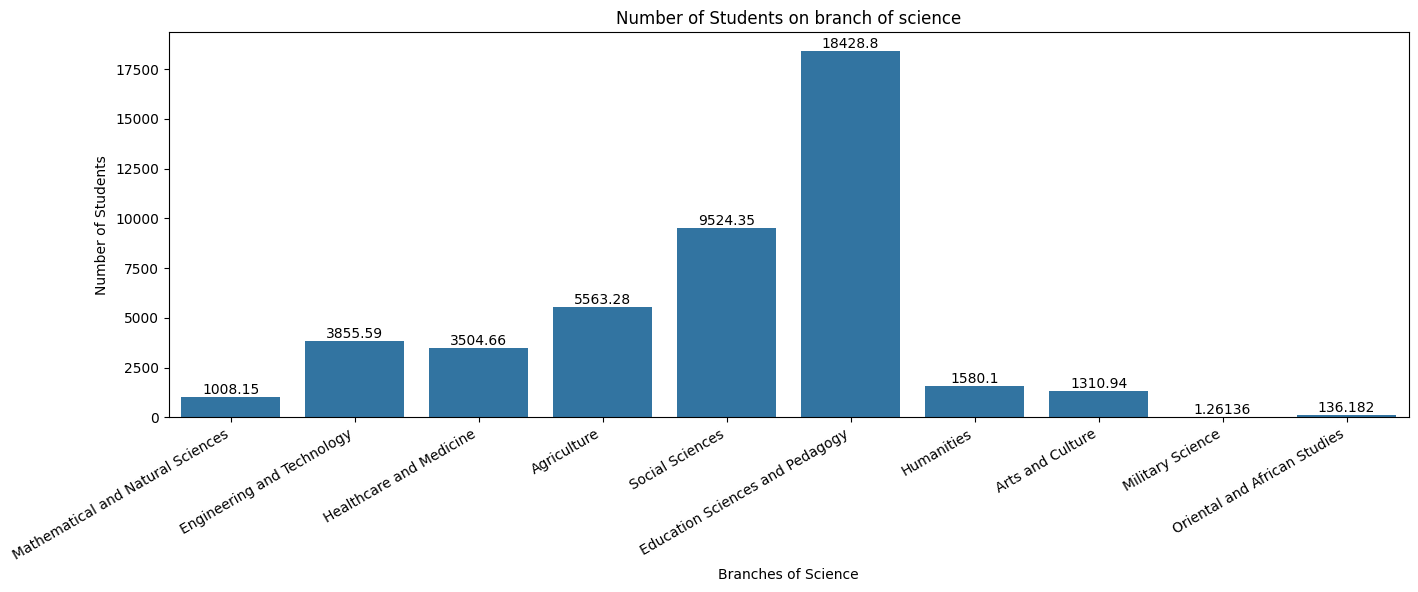

In [17]:
##Number of Students in branches of science
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df,x="Branches of Science",y="Number of Students",errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Number of Students on branch of science")
plt.xlabel("Branches of Science")
plt.ylabel("Number of Students")
plt.xticks(rotation=30,ha="right")
plt.show()


In Branches of Sciences , most preferred skills is Education Sciences and Pedagogy,followed by Social Sciences ,Agriculture,Engineering and Technology.This trend suggests a growing awareness of career-oriented and socially impactful fields among students pursuing science-related education.

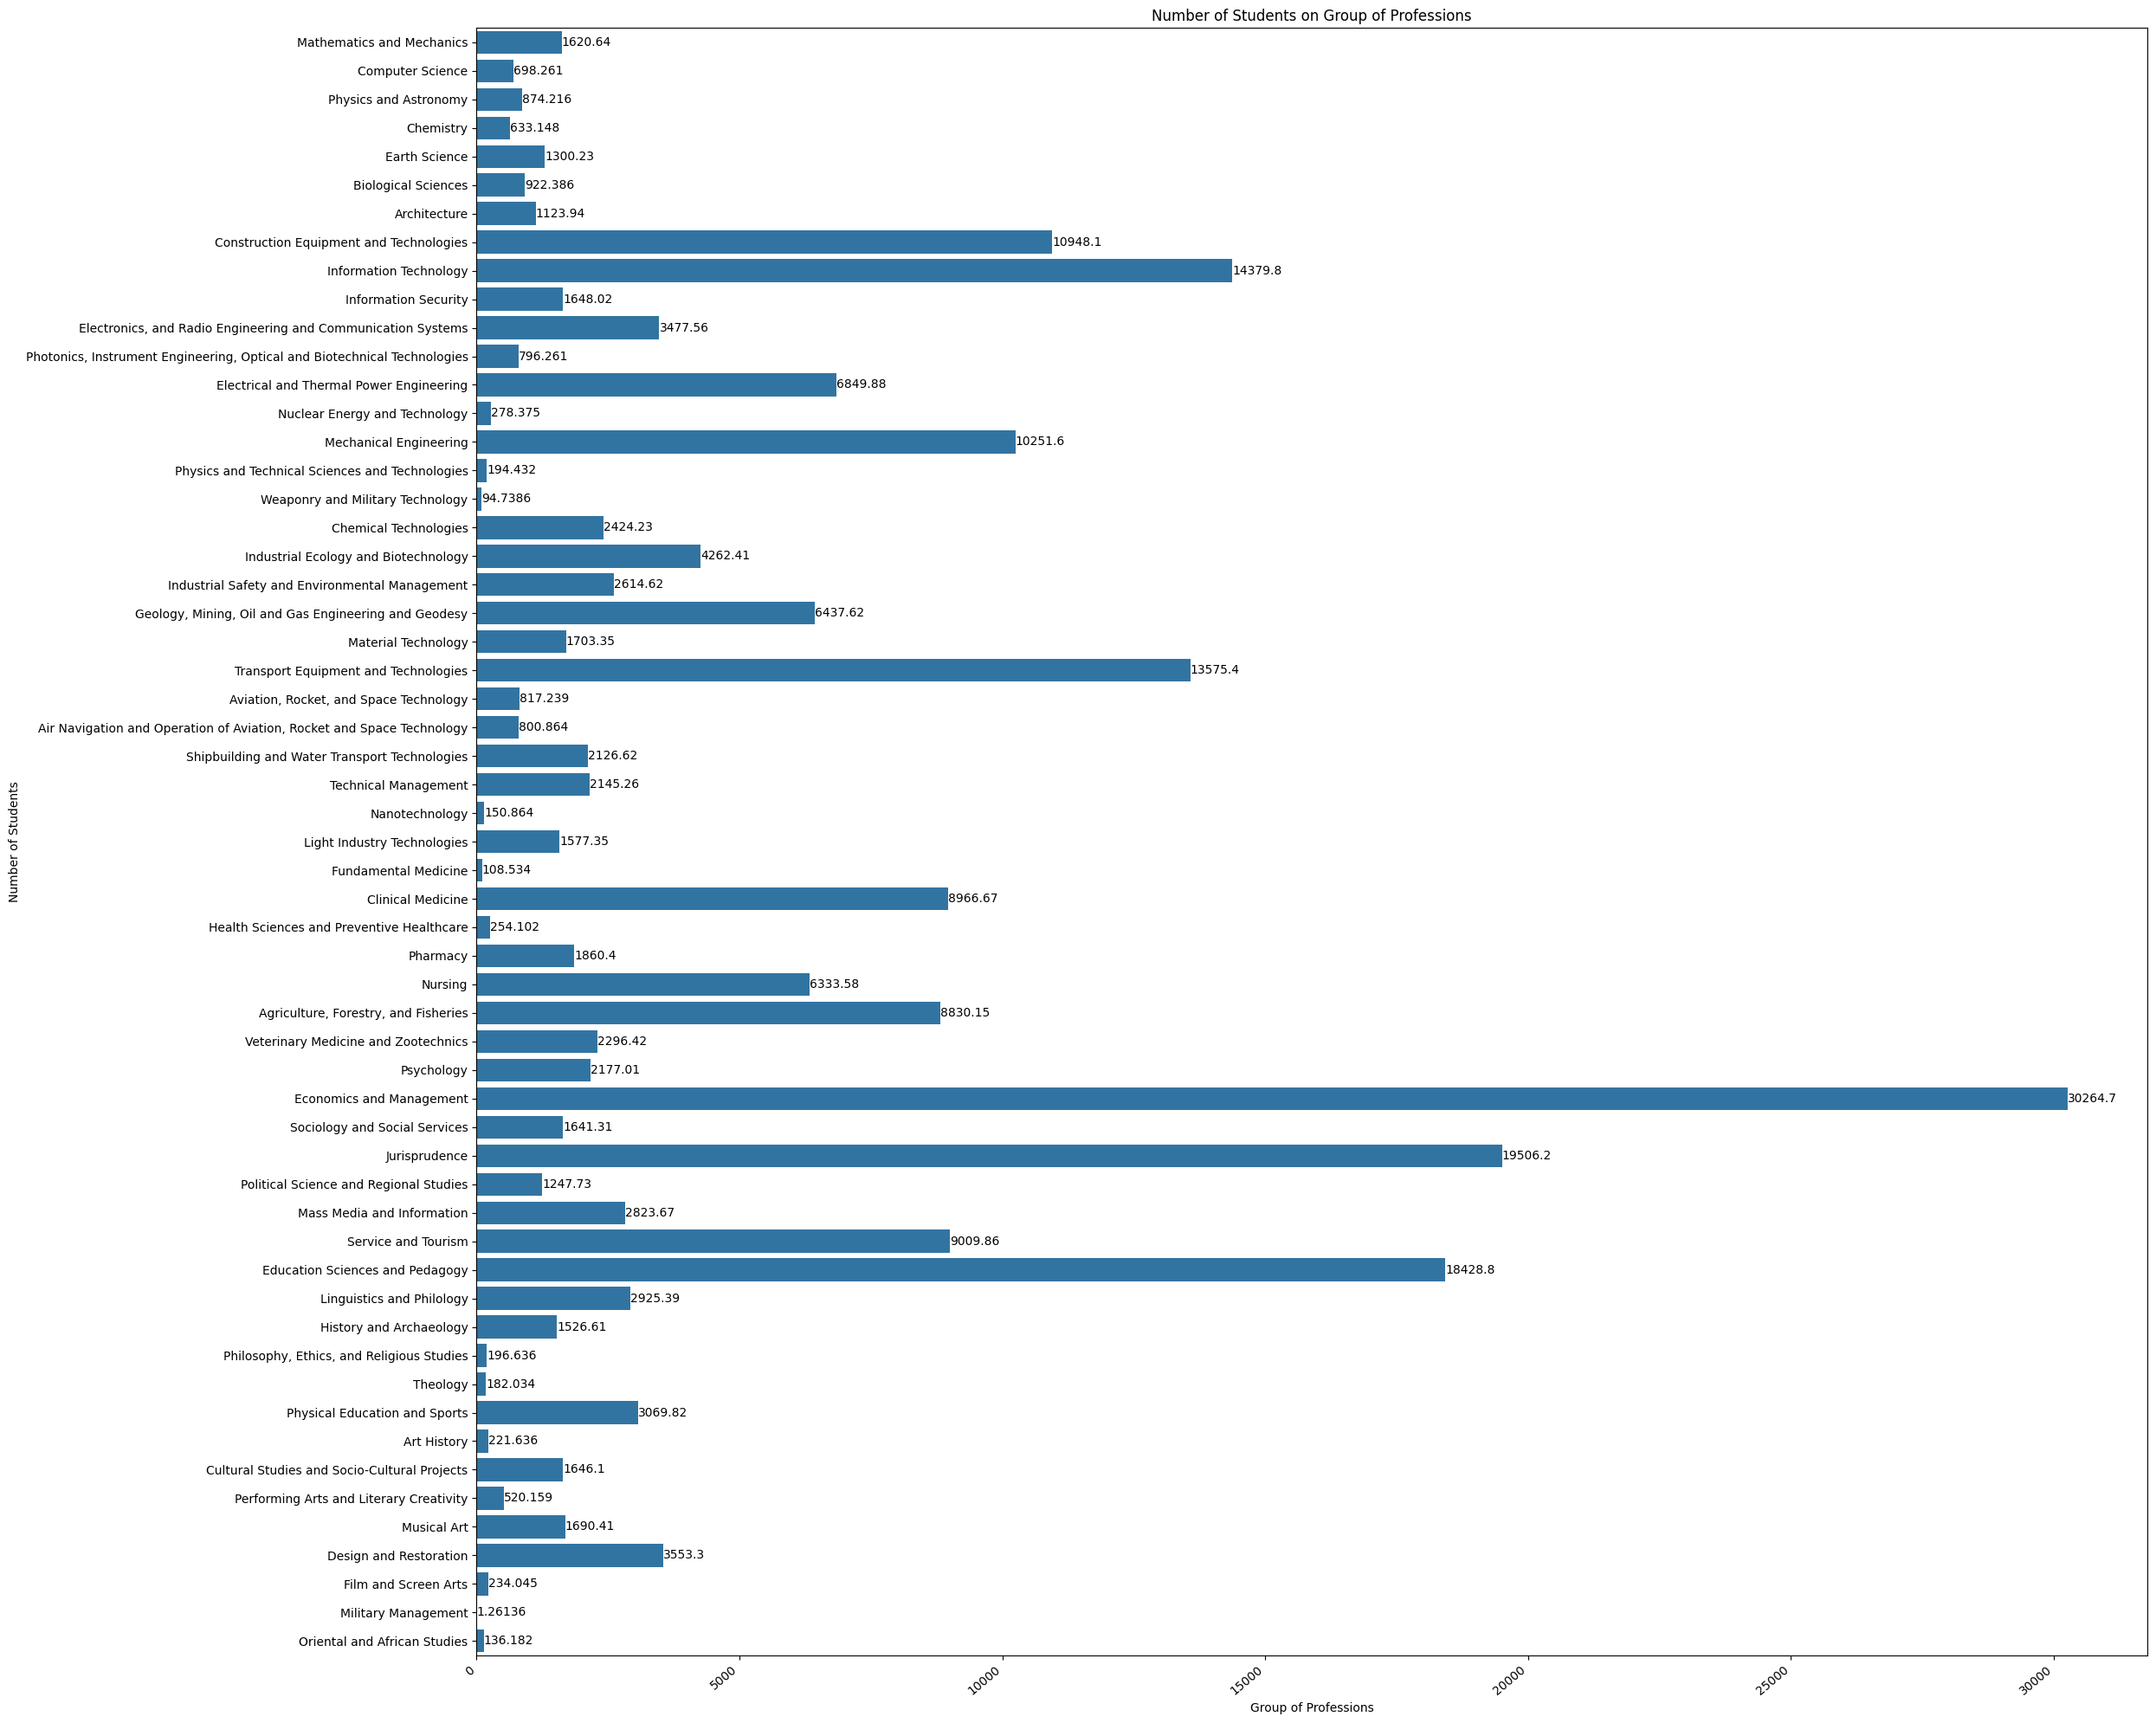

In [20]:
#Number of Students in Group of Professions
plt.figure(figsize=(25,20))
ax = sns.barplot(data=df,x="Number of Students",y="Group of Professions",errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Number of Students on Group of Professions")
plt.xlabel("Group of Professions")
plt.ylabel("Number of Students")
plt.xticks(rotation=40,ha="right")
plt.tight_layout()
plt.show()


Top 5 group of rofessions are Economics and Management,jurispedence,Education Sciences and Pedagogy,Information Technology,Transport Equipment and technologies

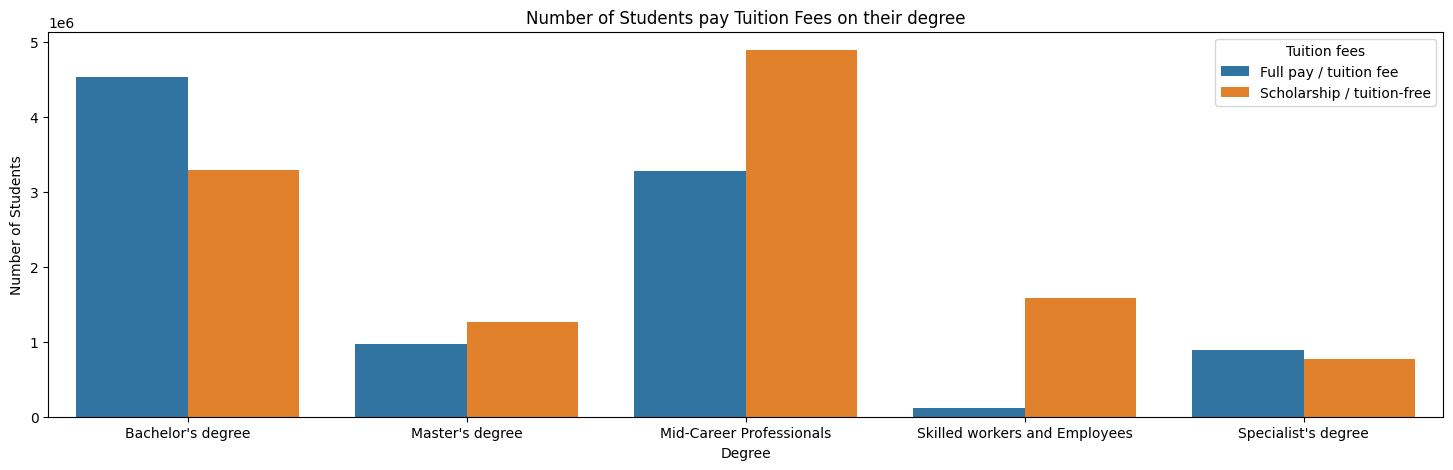

In [ ]:
##Number of Students Pay TuitionFees
df1= df[["Degree","Tuition fees","Number of Students"]].groupby(["Degree","Tuition fees"]).agg(n_students=("Number of Students","sum")).reset_index()
plt.subplots(figsize=(18,5))
sns.barplot(x="Degree",y="n_students",hue="Tuition fees",data=df1)
plt.xlabel("Degree")
plt.ylabel("Number of Students")
plt.title("Number of Students pay Tuition Fees on their degree")
plt.show()

For Bachelor's Degree and Specialist Degree, most of the students paid their tutition fees in full payment indicate a stronger reliance on self-funded education compared to scholarships.In Master's degree,mid-career Professions and Skilled workers and Employees degrees, Students who paid tutition fees through scholarship was higher than full pay